<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Data-Set-Features-and-Target" data-toc-modified-id="Data-Set-Features-and-Target-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Set Features and Target</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#Weight" data-toc-modified-id="Weight-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Weight</a></span></li><li><span><a href="#AP_HI" data-toc-modified-id="AP_HI-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>AP_HI</a></span></li><li><span><a href="#AP_LO" data-toc-modified-id="AP_LO-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>AP_LO</a></span></li><li><span><a href="#Height" data-toc-modified-id="Height-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Height</a></span></li></ul></li><li><span><a href="#Result-of-Data-Cleaning" data-toc-modified-id="Result-of-Data-Cleaning-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Result of Data Cleaning</a></span></li></ul></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#BMI-and-Gender-Calculation" data-toc-modified-id="BMI-and-Gender-Calculation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>BMI and Gender Calculation</a></span></li></ul></li><li><span><a href="#The-Classification-Models" data-toc-modified-id="The-Classification-Models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>The Classification Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Result-of-Logisitic-Regression" data-toc-modified-id="Result-of-Logisitic-Regression-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Result of Logisitic Regression</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Result-of-Random-Forest" data-toc-modified-id="Result-of-Random-Forest-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Result of Random Forest</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li></ul></div>

# Final Project Submission


* Student name: Annika Noren
* Student pace:July15, part time
* Scheduled project review date/time: 
* Instructor name: February 27, 2020 @ 2:30pm
* Blog post URL:


# Data Set Features and Target

Source: https://www.kaggle.com/sulianova/eda-cardiovascular-data

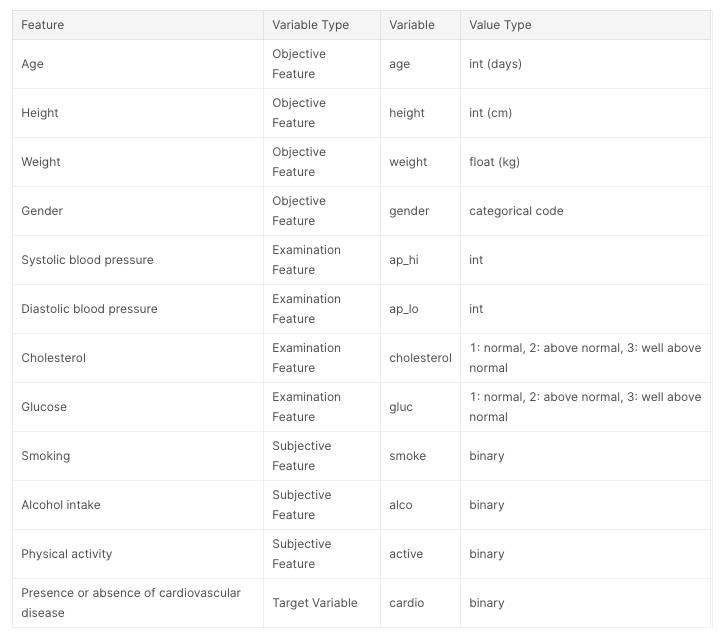


Blood Pressure Summary (from heart.org): 
 - Systolic blood pressure (ap_hi, the first number recorded) indicates how much pressure your blood is exerting against the artery walls when the heart beats
 - Diastolic blood pressure (ap_lo, the second number recorded) indicates how much pressure your blood is exerting against the artery walls while the heart is resting between beats.
 
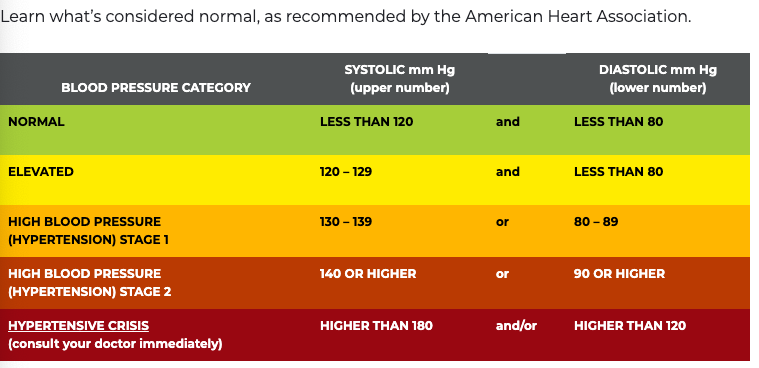

# Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from matplotlib.pylab import rcParams
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import itertools
import statsmodels.api as sm
import operator

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost import plot_importance



# EDA

In [ ]:
df = pd.read_csv("cardio_train.csv",sep=";")
df_control = pd.read_csv("cardio_train.csv",sep=";")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

# Data Cleaning

In [ ]:
# Drop id column
df.drop("id",axis=1,inplace=True)

In [ ]:
# Check for null values
df.isna().sum()

In [ ]:
# Check for duplicates and remove them
print("There are {} duplicated values in this dataset.".format(df.duplicated().sum()))

In [ ]:
duplicates = df[df.duplicated(keep=False)]

In [ ]:
duplicates.sort_values(by=['age']).head(6)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print("Now there are {} duplicated values in this dataset.".format(df.duplicated().sum()))

## Outliers

### Weight

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(df['weight'])

In [ ]:
# plt.figure(figsize=(10,10))
# plt.boxplot(df['weight'])
# plt.xticks([1], ['weight'])

In [ ]:
# 30 kg is about 66 pounds
lo_weight_outlier = df.loc[df['weight'] < 30 ]
lo_weight_outlier

In [ ]:
temp = df[df['weight'] < 30].index
df.drop(temp,inplace=True)

In [ ]:
# 200 kg is about 440 pounds, not likely but possible so those 4 values will remain
hi_weight_outlier = df.loc[df['weight'] > 180 ]
hi_weight_outlier

### AP_HI

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(df['ap_hi'])

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(df['ap_hi'])
plt.xticks([1], ['ap_hi'])

In [ ]:
lo_ap_hi_outlier = df.loc[df['ap_hi'] < 20 ]
lo_ap_hi_outlier.head()

In [ ]:
hi_ap_hi_outlier = df.loc[df['ap_hi'] > 300]
hi_ap_hi_outlier.info()

In [ ]:
# drop low and high ap_hi values

df = df.drop(df[(df.ap_hi < 30) | (df.ap_hi > 300)].index)

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(df['ap_hi'])

### AP_LO

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(df['ap_lo'])

In [ ]:
# plt.figure(figsize=(10,10))
# plt.boxplot(df['ap_lo'])
# plt.xticks([1], ['ap_lo'])

In [ ]:
lo_ap_lo_outlier = df.loc[df['ap_lo'] <= 20 ]
lo_ap_lo_outlier.head()

In [ ]:
hi_ap_lo_outlier = df.loc[df['ap_lo'] > 200 ]
hi_ap_lo_outlier.info()

In [ ]:
df = df.drop(df[(df.ap_lo < 30) | (df.ap_lo > 200)].index)

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(df['ap_lo'])

### Height

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(df['height'])

In [ ]:
# plt.figure(figsize=(10,10))
# plt.boxplot(df['height'])
# plt.xticks([1], ['height'])

In [ ]:
lo_height_outlier = df.loc[df['height'] < 125 ]
lo_height_outlier.head()

In [ ]:
hi_height_outlier = df.loc[df['height'] > 225 ]
hi_height_outlier

In [ ]:
# Drop just two values 100 cm is a little over 3 feet tall
df = df.drop(df[(df.height < 101)].index)

## Result of Data Cleaning

In [ ]:
print('The data set is now {} rows.'.format(len(df)))
df.describe()

# Visualizations

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df);

In [ ]:
# df_control['years'] = (df_control['age'] / 365).round().astype('int')
# sns.countplot(x='years', hue='cardio', data = df_control);

In [ ]:
sns.countplot(x='active', hue='cardio', data = df);

In [ ]:
df.drop("years",axis=1,inplace=True)
df.head()

In [ ]:
#df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data=df.corr(), annot=True, center=0, ax=ax)

From the heatmap, there is high correlation between cardio vascular disease and 3 features: blood pressure (ap_hi, ap_lo) and age.  Followed closely by age, cholesterol and weight. Interestingly gender and height are not correlated. 

## BMI and Gender Calculation

In [ ]:
df["bmi"] = df["weight"]/ (df["height"]/100)**2
df.head()

In [ ]:
df.groupby('gender')['height'].mean()

In [ ]:
df['gender'].value_counts()

# The Classification Models
- Logistic Regression
- Random Forest
- XG Boost
- KNN

## Logistic Regression

In [ ]:
# Split data to target and features
y = df['cardio']
X = df.drop('cardio', axis=1)

In [ ]:
# Normalize data
X = X.apply(lambda x: ((x - min(x)) / (max(x) - min(x))), axis=0)
X.head(3)

In [ ]:
# Test-train split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

In [ ]:
# Generate predictions
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [ ]:
# Train set accuracy 
residuals = np.abs(y_train - y_hat_train)
# print(pd.Series(residuals).value_counts())
# print(pd.Series(residuals).value_counts(normalize=True))
a, b = (pd.Series(residuals).value_counts(normalize=True))
print(a)

In [ ]:
# Test set accuracy
residuals = np.abs(y_test - y_hat_test)
# print(pd.Series(residuals).value_counts())
# print(pd.Series(residuals).value_counts(normalize=True))
lr_accuracy,b = (pd.Series(residuals).value_counts(normalize=True))
print(lr_accuracy)

### Result of Logisitic Regression
About 72% accurancy on the train and test set with this model

## Random Forest

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center',color='#1c3290') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance', fontsize=20)
    plt.ylabel('Feature',fontsize=20)

In [ ]:
def random_forest(X_train,y_train,X_test,y_test):
    '''Instatiate and fit the random tree classifer'''
    
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(X_train, y_train)
    
    '''Train set accuracy'''
    train = forest.score(X_train,y_train)
    
    '''Test set accuracy'''
    test = forest.score(X_test,y_test)
    
    plot_feature_importances(forest)
    
    return('The accurancy of the Random Forest model is {}'.format(test))

In [ ]:
random_forest(X_train,y_train,X_test,y_test)

In [ ]:
# forest = RandomForestClassifier(n_estimators=100)
# forest.fit(X_train, y_train)

In [ ]:
# Train set accuracy
# forest.score(X_train,y_train)

In [ ]:
# Test set accuracy
# rf_accuracy = forest.score(X_test,y_test)
# rf_accuracy

In [ ]:
# plot_feature_importances(forest)

### Result of Random Forest
About 71% accurancy of the model on the test data.

## XGBoost

In [ ]:
def XGBoost(X_train,y_train,X_test,y_test):
    param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
    }
    
    clf = XGBClassifier()
    grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
    grid_clf.fit(X_train, y_train)

    best_parameters = grid_clf.best_params_

    print('Grid Search found the following optimal parameters: ')
    for param_name in sorted(best_parameters.keys()):
        print('%s: %r' % (param_name, best_parameters[param_name]))

    training_preds = grid_clf.predict(X_train)
    test_preds = grid_clf.predict(X_test)
    train = accuracy_score(y_train, training_preds)
    test = accuracy_score(y_test, test_preds)
    
    plot_importance(clf)

    # print('Training Accuracy: {:.4}%'.format(train * 100))
    return('The accurancy of the XGBoost model is {}'.format(test))

In [ ]:
XGBoost(X_train,y_train,X_test,y_test)